In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [3]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("listings.csv")

In [4]:
# Showing dataframe dimensions
listings_df.shape

(17230, 75)

In [5]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17230 non-null  int64  
 1   listing_url                                   17230 non-null  object 
 2   scrape_id                                     17230 non-null  int64  
 3   last_scraped                                  17230 non-null  object 
 4   source                                        17230 non-null  object 
 5   name                                          17230 non-null  object 
 6   description                                   17120 non-null  object 
 7   neighborhood_overview                         9879 non-null   object 
 8   picture_url                                   17230 non-null  object 
 9   host_id                                       17230 non-null 

In [7]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9978,48343415,https://www.airbnb.com/rooms/48343415,20230610001920,2023-06-10,city scrape,Condo in Barcelona · ★5.0 · 2 bedrooms · 2 bed...,"Beautiful apartment completely renovated, loca...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3465149,https://www.airbnb.com/users/show/3465149,Jordi,2012-09-04,"Barcelona, Spain","Hello, we Gemma and Jordi !\r\nBorn in Barcelo...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3465149/profi...,https://a0.muscache.com/im/users/3465149/profi...,Vila de Gràcia,6.0,9.0,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.39378,2.16992,Entire condo,Entire home/apt,5,NaN,2 baths,2.0,2.0,"[""Fire extinguisher"", ""Refrigerator"", ""Wine gl...",$149.00,31,180,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,11,21,51,326,2023-06-10,3,3,0,2022-08-20,2023-04-08,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,6,6,0,0,0.31
6008,29351690,https://www.airbnb.com/rooms/29351690,20230610001920,2023-06-10,previous scrape,Rental unit in Barcelona · ★4.46 · 1 bedroom ·...,Habitación de 22 metros cuadrados en pleno cen...,Barrio multicultural. Muy buen ambiente y perf...,https://a0.muscache.com/pictures/80096969-6904...,218633632,https://www.airbnb.com/users/show/218633632,Robert,2018-10-03,"Barcelona, Spain","Soy una persona joven, dinámica y que cuando v...",NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/c32cf...,https://a0.muscache.com/im/pictures/user/c32cf...,NaN,1.0,4.0,"['email', 'phone']",t,f,"Barcelona, CT, Spain",el Raval,Ciutat Vella,41.37775,2.16495,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,1.0,"[""Shampoo"", ""Kitchen"", ""Pets allowed"", ""Hanger...",$35.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2023-06-10,13,0,0,2018-10-21,2019-01-14,4.46,4.85,4.69,4.77,4.92,4.38,4.46,NaN,t,1,0,1,0,0.23
1393,3845305,https://www.airbnb.com/rooms/3845305,20230610001920,2023-06-10,previous scrape,Rental unit in Barcelona · 1 bedroom · 1 bed ·...,<b>The space</b><br />Double room in the middl...,NaN,https://a0.muscache.com/pictures/99800163/04a3...,19821352,https://www.airbnb.com/users/show/19821352,Guillem,2014-08-11,"Barcelona, Spain",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/users/19821352/prof...,https://a0.muscache.com/im/users/19821352/prof...,El Raval,1.0,1.0,"['email', 'phone']",t,f,NaN,el Raval,Ciutat Vella,41.37780,2.17361,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,1.0,"[""Fire extinguisher"", ""Kitchen"", ""Washer"", ""Wi...",$65.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2023-06-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
14078,745775704143486752,https://www.airbnb.com/rooms/74577

## 2. Univariate analysis

In [8]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()

17230

In [9]:
# Showing unique values of neighbourhoods
listings_df["neighbourhood_cleansed"].unique()

array(['la Sagrada Família', 'el Besòs i el Maresme',
       "el Camp d'en Grassot i Gràcia Nova",
       'Sant Pere, Santa Caterina i la Ribera', 'el Barri Gòtic',
       'la Barceloneta', "la Dreta de l'Eixample",
       'Vallcarca i els Penitents', 'el Raval', 'Sant Antoni',
       'el Fort Pienc', 'el Poblenou', 'la Vila Olímpica del Poblenou',
       'Vallvidrera, el Tibidabo i les Planes', 'Sants', 'el Clot',
       'el Poble Sec', 'la Vila de Gràcia', 'la Font de la Guatlla',
       "la Nova Esquerra de l'Eixample",
       'Diagonal Mar i el Front Marítim del Poblenou', 'Pedralbes',
       'el Guinardó', "l'Antiga Esquerra de l'Eixample", 'el Coll',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Sant Martí de Provençals', 'Navas', "el Camp de l'Arpa del Clot",
       'Sarrià', 'el Parc i la Llacuna del Poblenou', 'Sants - Badal',
       'el Baix Guinardó', 'el Congrés i els Indians', 'Torre Baró',
       'la Prosperitat', 'el Turó de la Peira', 'Provençals del 

In [72]:

len(listings_df["neighbourhood_cleansed"].unique())

70

In [10]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Entire home/apt    0.595589
Private room       0.387406
Shared room        0.008706
Hotel room         0.008299
Name: room_type, dtype: float64

In [11]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    17230.000000
mean         3.409460
std          2.145476
min          0.000000
5%           1.000000
25%          2.000000
50%          3.000000
75%          4.000000
95%          7.000000
max         16.000000
Name: accommodates, dtype: float64

<span style="color: red;">What does it means the value of 0 for this attribute?</span>

In [12]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

[]

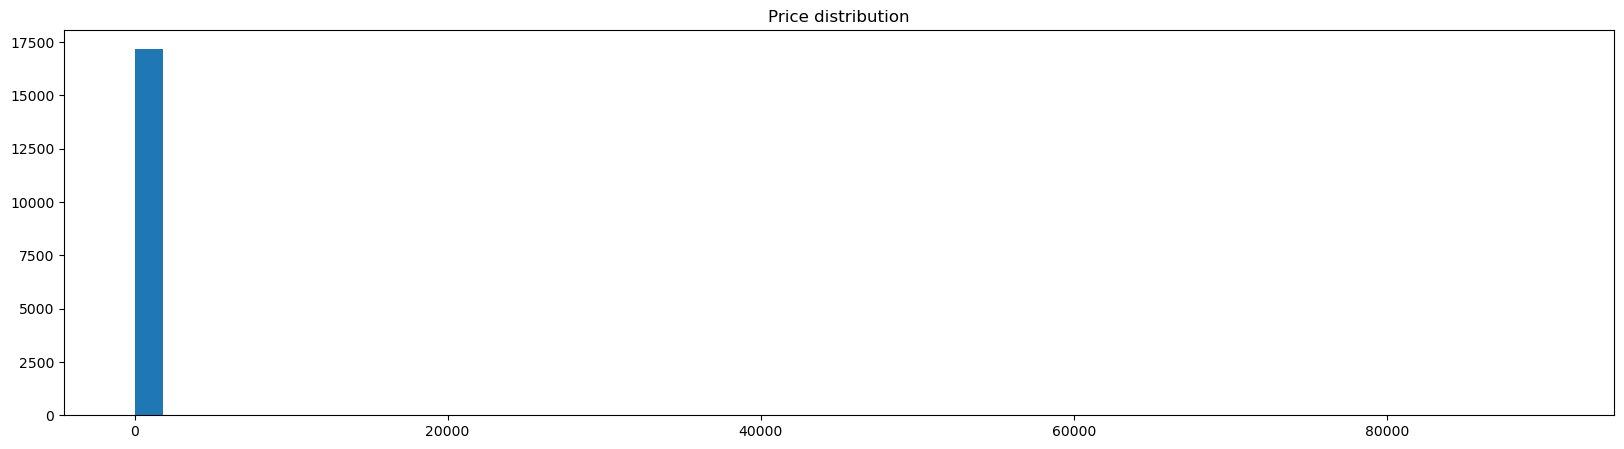

In [13]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")

plt.plot()

<span style="color: red;">This attribute has a extreme outlier making difficult a proper visualization?</span>

In [14]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

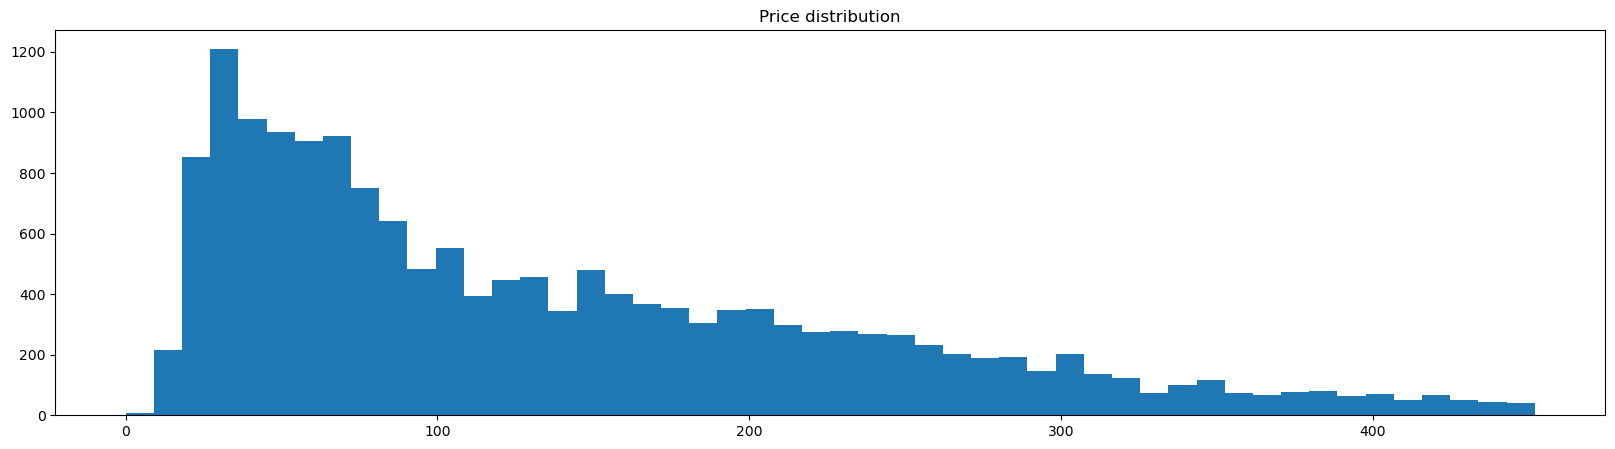

In [15]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [73]:
listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"].describe()

count    16496.000000
mean       135.809772
std        100.904271
min          0.000000
25%         53.000000
50%        104.000000
75%        199.000000
max        452.000000
Name: price_float, dtype: float64

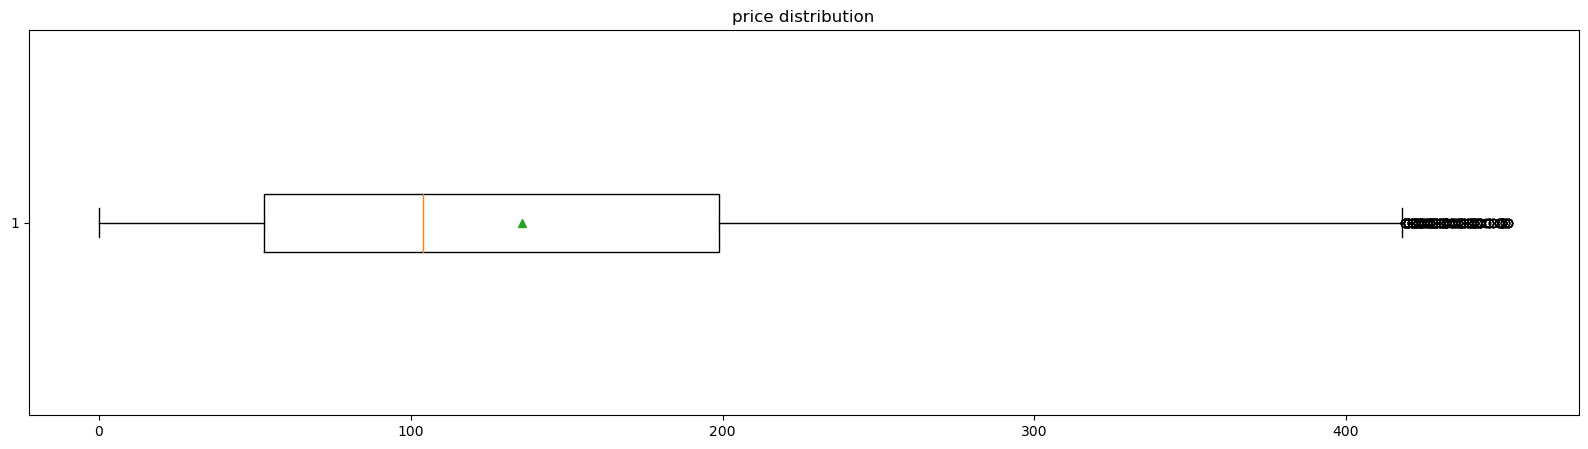

In [74]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], showmeans=True, vert=False)
plt.title("price distribution")
plt.show()

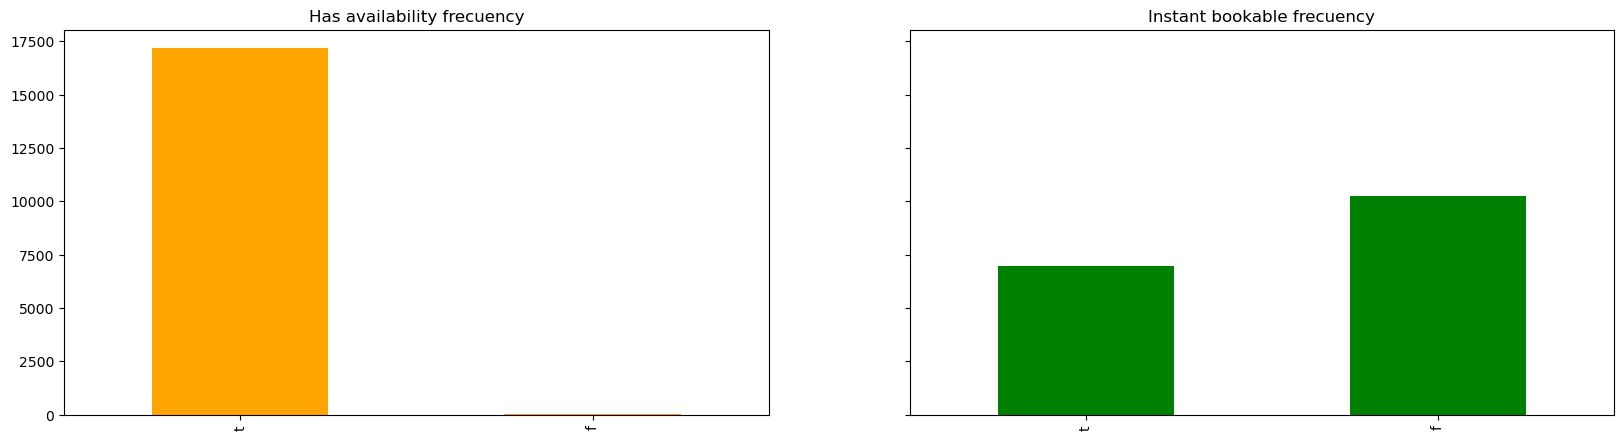

In [16]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

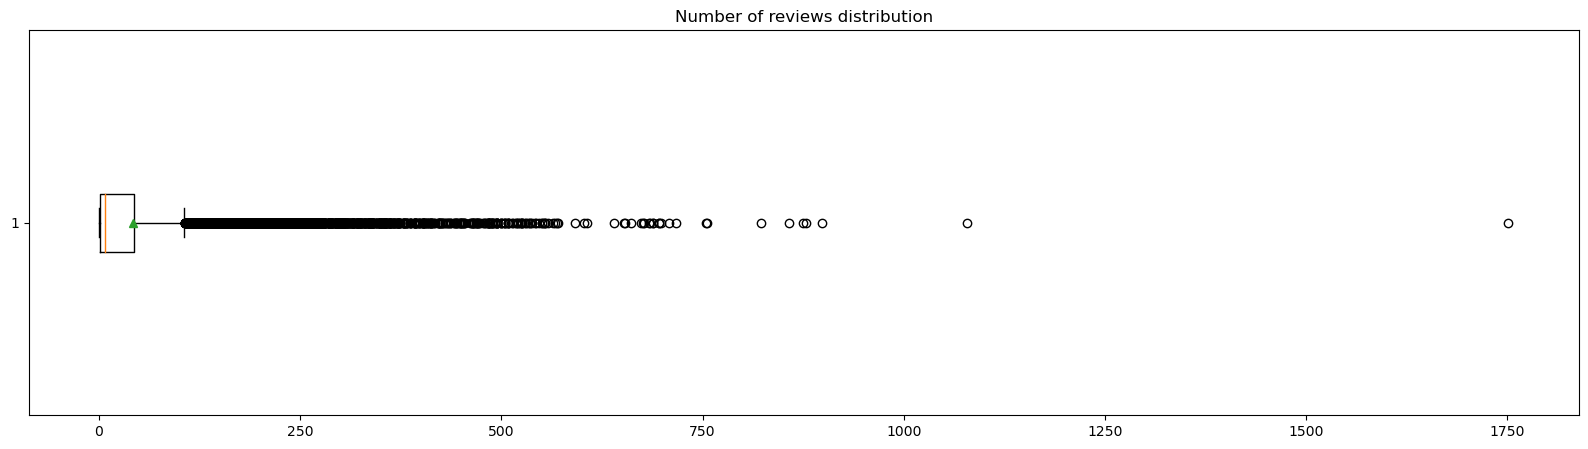

In [17]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

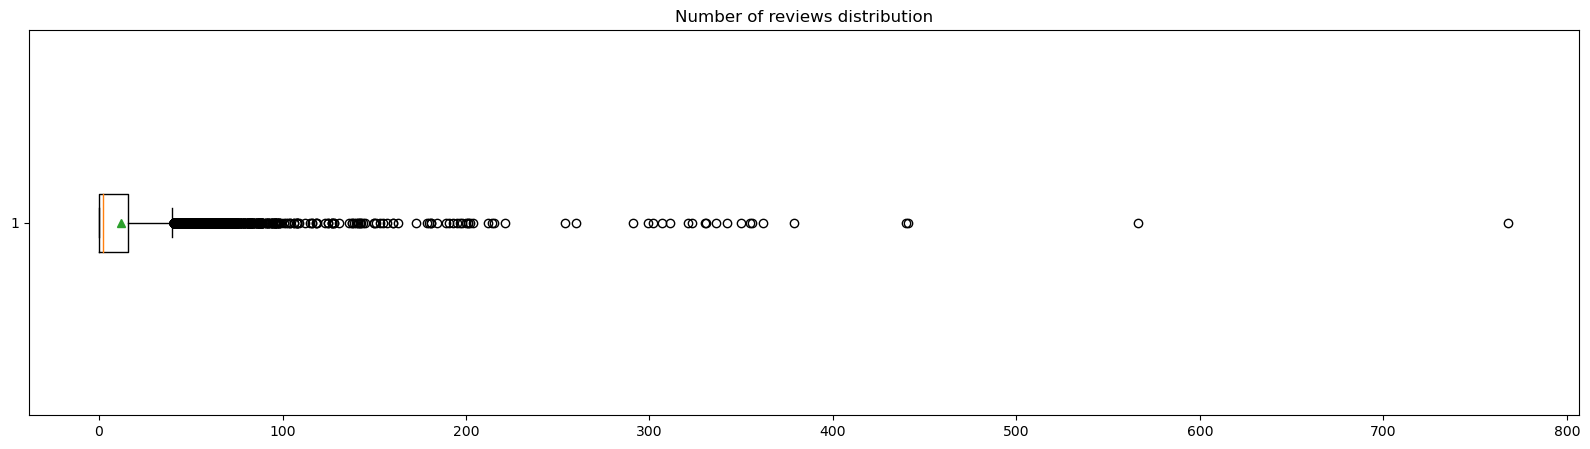

In [18]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews_ltm"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

In [77]:
listings_df["number_of_reviews_ltm"].describe()

count    17230.000000
mean        11.988799
std         23.295948
min          0.000000
25%          0.000000
50%          2.000000
75%         16.000000
max        768.000000
Name: number_of_reviews_ltm, dtype: float64

In [76]:
listings_df["number_of_reviews_ltm"].median()

2.0

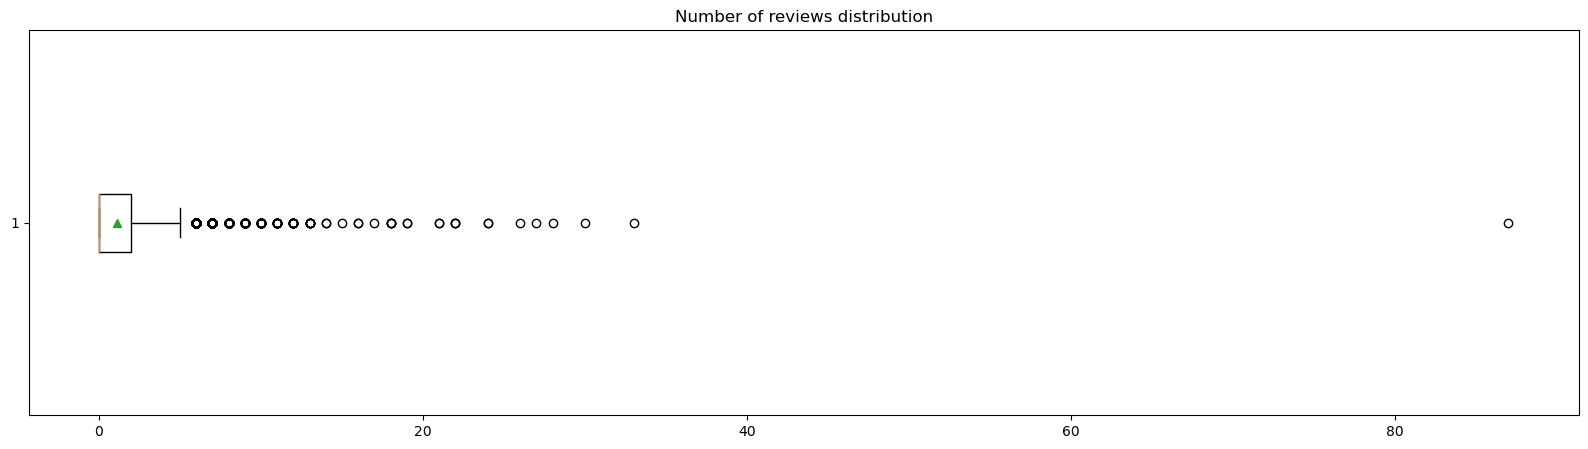

In [19]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews_l30d"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

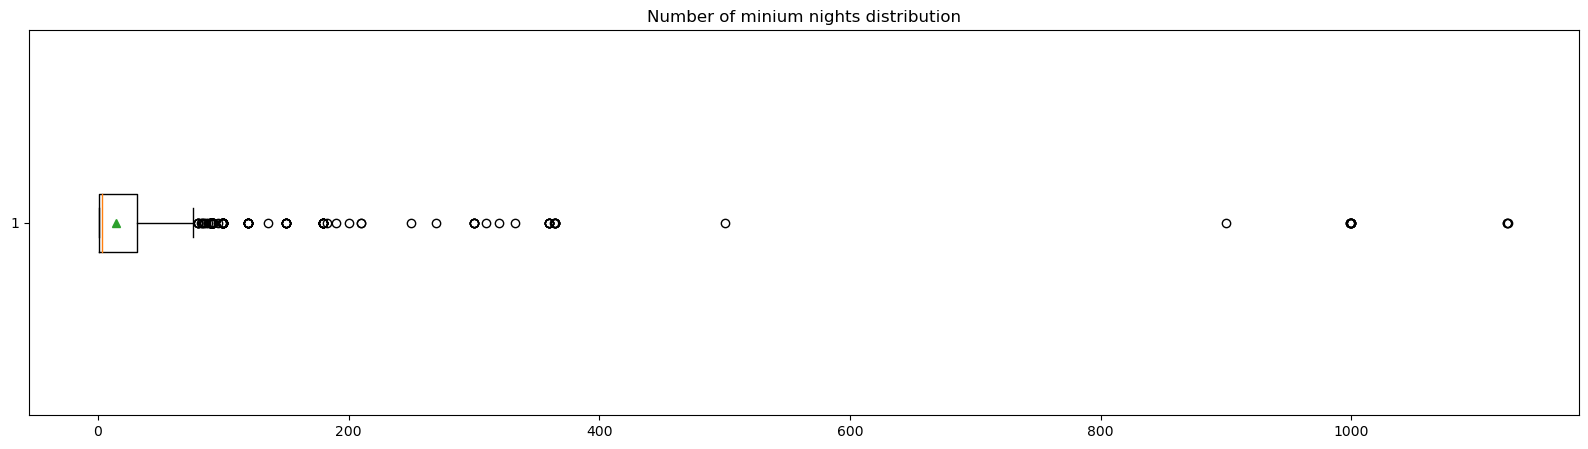

In [84]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["minimum_nights"], showmeans=True, vert=False)
plt.title("Number of minium nights distribution")
plt.show()

In [83]:
# listings_df[listings_df["minimum_nights"]>900]['has_availability']

In [78]:
listings_df["minimum_nights"].describe()

count    17230.000000
mean        14.375218
std         33.905670
min          1.000000
25%          1.000000
50%          3.000000
75%         31.000000
max       1125.000000
Name: minimum_nights, dtype: float64

In [79]:
listings_df["minimum_nights"].median()

3.0

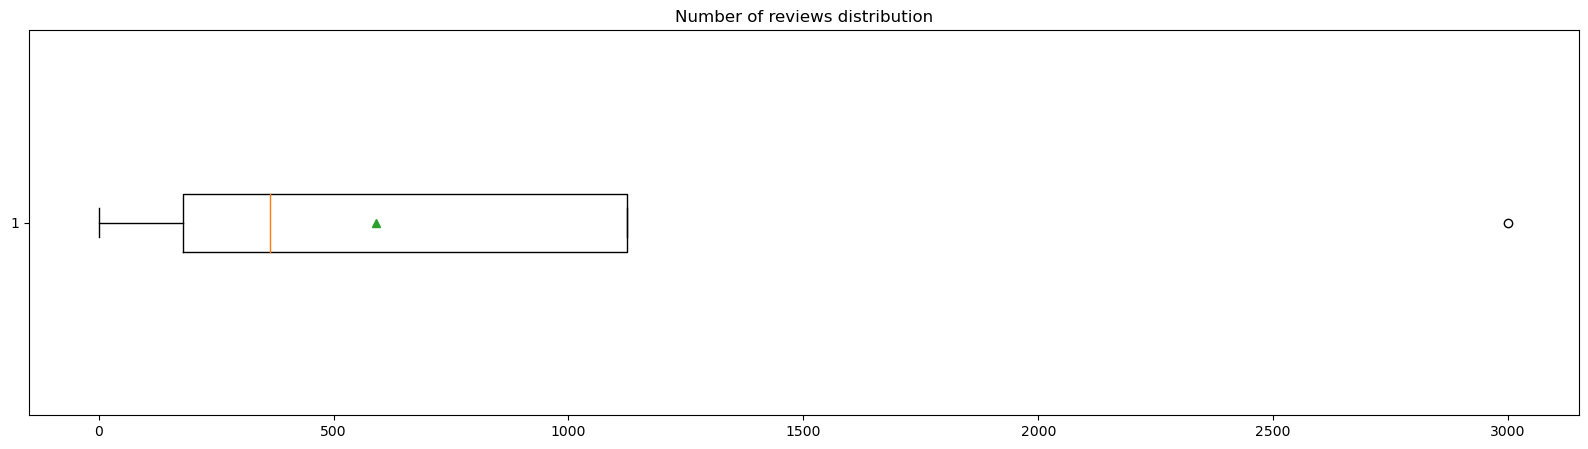

In [69]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["maximum_nights"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

In [70]:
listings_df["minimum_nights_avg_ntm"].describe()

count    17229.000000
mean        17.133049
std         41.992035
min          1.000000
25%          2.000000
50%          3.800000
75%         31.000000
max       1125.000000
Name: minimum_nights_avg_ntm, dtype: float64

In [71]:
listings_df["maximum_nights_avg_ntm"].describe()

count    1.722900e+04
mean     2.499648e+05
std      2.313674e+07
min      1.000000e+00
25%      3.300000e+02
50%      8.604000e+02
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights_avg_ntm, dtype: float64

In [68]:
# listings_df[(listings_df["minimum_nights"]>100) & (listings_df["has_availability"]=="f")]

[]

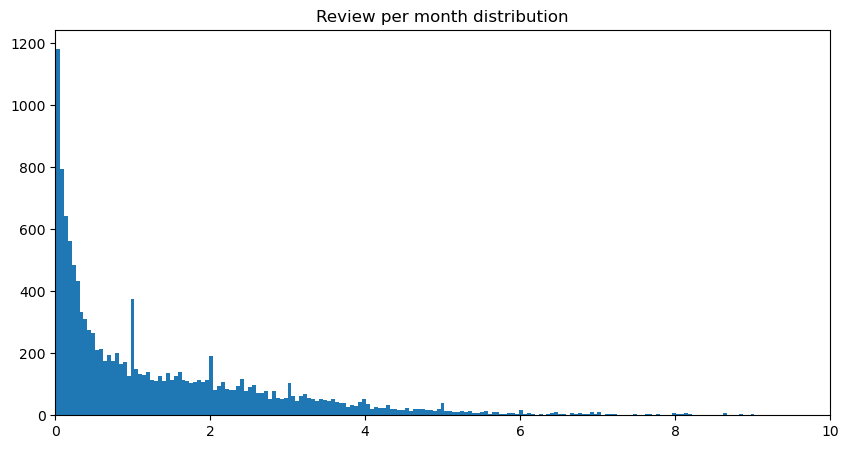

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(listings_df["reviews_per_month"], bins=1000)
plt.title("Review per month distribution")
plt.xlim(0,10)
plt.plot()

In [25]:
listings_df["reviews_per_month"].describe()

count    13198.000000
mean         1.438544
std          1.839384
min          0.010000
25%          0.230000
50%          0.870000
75%          2.100000
max         50.640000
Name: reviews_per_month, dtype: float64

In [75]:
listings_df["reviews_per_month"].median()

0.87

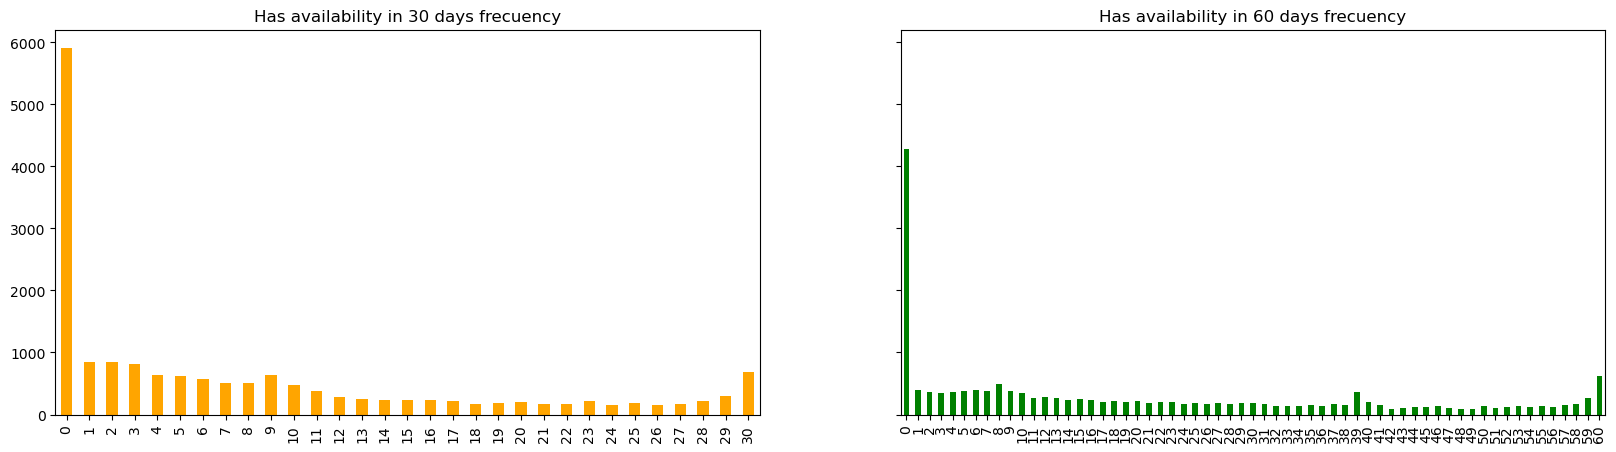

In [20]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["availability_30"].value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax1, color="orange")
listings_df["availability_60"].value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability in 30 days frecuency")
ax2.set_title("Has availability in 60 days frecuency")
plt.show()

In [40]:
# listings_df[listings_df["availability_60"]==0]

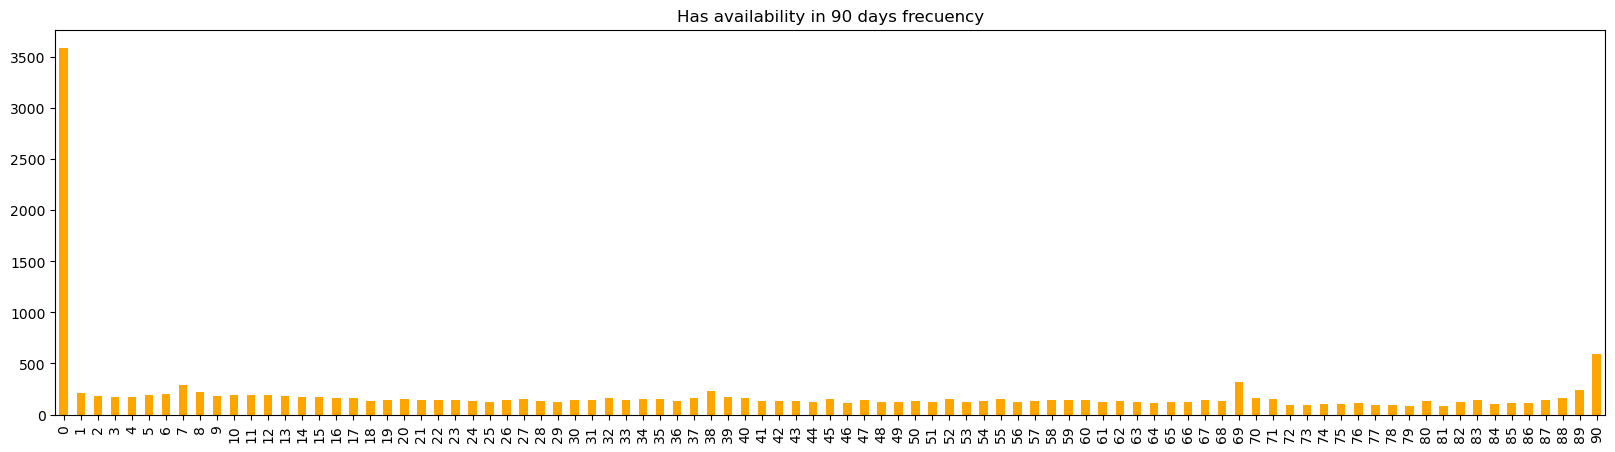

In [21]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(20, 5))
listings_df["availability_90"].value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax1, color="orange")
ax1.set_title("Has availability in 90 days frecuency")
plt.show()

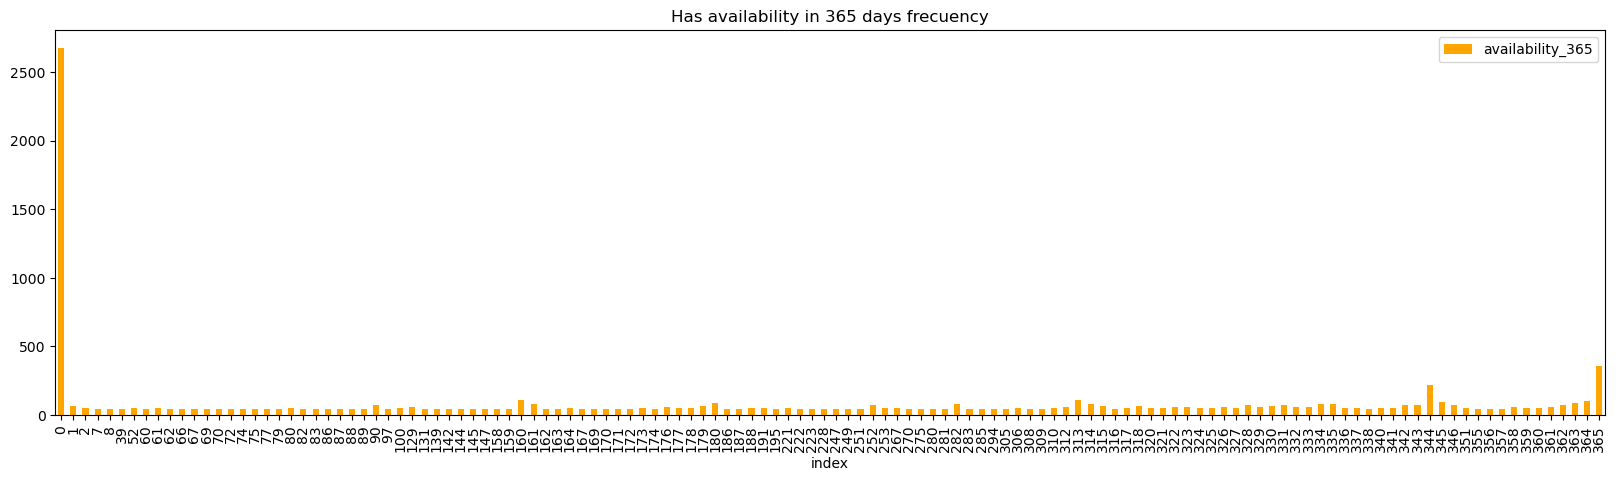

In [41]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(20, 5))
listing_df_365_vc=listings_df["availability_365"].value_counts().reset_index()
listing_df_365_vc.loc[listing_df_365_vc['availability_365']>40].set_index('index').sort_index(ascending=True).plot(kind="bar", ax=ax1, color="orange")
ax1.set_title("Has availability in 365 days frecuency")
plt.show()

In [42]:
listing_df_365_vc.reset_index()

,level_0,index,availability_365
0,0,0,2671
1,1,365,359
2,2,344,216
3,3,160,113
4,4,313,110
...,...,...,...
361,361,243,17
362,362,22,17
363,363,214,16
364,364,248,16


In [43]:
# listings_df[(listings_df["instant_bookable"]=="t")]["availability_30"]

In [59]:
listings_df["host_acceptance_rate_float"]=listings_df["host_acceptance_rate"].str.replace("%", "", regex=True).astype(float)
listings_df["host_acceptance_rate_float"] = listings_df["host_acceptance_rate_float"]/100

In [60]:
listings_df["host_acceptance_rate_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    14472.000000
mean         0.888384
std          0.213721
min          0.000000
5%           0.400000
25%          0.900000
50%          0.990000
75%          1.000000
95%          1.000000
max          1.000000
Name: host_acceptance_rate_float, dtype: float64

In [61]:
listings_df["host_acceptance_rate_float"].unique()

array([0.93, 1.  , 0.83, 0.97, 0.68, 0.  , 0.95, 0.07, 0.99, 0.94, 0.74,
       0.67, 0.14, 0.89,  nan, 0.6 , 0.81, 0.98, 0.08, 0.48, 0.75, 0.65,
       0.8 , 0.78, 0.92, 0.9 , 0.39, 0.54, 0.86, 0.91, 0.96, 0.19, 0.77,
       0.66, 0.5 , 0.69, 0.87, 0.88, 0.56, 0.73, 0.76, 0.4 , 0.25, 0.84,
       0.33, 0.29, 0.7 , 0.63, 0.85, 0.82, 0.31, 0.72, 0.59, 0.44, 0.42,
       0.53, 0.35, 0.58, 0.71, 0.64, 0.45, 0.79, 0.2 , 0.09, 0.34, 0.49,
       0.16, 0.38, 0.36, 0.57, 0.06, 0.27, 0.62, 0.46, 0.22, 0.52, 0.23,
       0.61, 0.28, 0.12, 0.17, 0.55, 0.11, 0.3 , 0.43, 0.37, 0.01, 0.26,
       0.21, 0.47, 0.13, 0.32, 0.41, 0.03, 0.51, 0.15, 0.05])

In [62]:
listings_df["number_of_reviews"].describe()

count    17230.000000
mean        42.310215
std         83.509961
min          0.000000
25%          1.000000
50%          7.000000
75%         43.000000
max       1751.000000
Name: number_of_reviews, dtype: float64

In [63]:
listings_df["number_of_reviews_ltm"].describe()

count    17230.000000
mean        11.988799
std         23.295948
min          0.000000
25%          0.000000
50%          2.000000
75%         16.000000
max        768.000000
Name: number_of_reviews_ltm, dtype: float64

In [64]:
listings_df["number_of_reviews_l30d"].describe()

count    17230.000000
mean         1.100000
std          2.107846
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         87.000000
Name: number_of_reviews_l30d, dtype: float64

In [46]:
listings_df["first_review"]

0        2013-05-27
1        2011-03-15
2        2011-07-17
3        2012-05-14
4        2011-01-04
            ...    
17225           NaN
17226           NaN
17227           NaN
17228           NaN
17229           NaN
Name: first_review, Length: 17230, dtype: object

In [47]:
def return_year(entrada):
    if not isinstance(entrada,float):
        return entrada.split("-")[0]
    return entrada

In [48]:
listings_df['year_first_review'] = listings_df["first_review"].apply(return_year)
listings_df['year_last_review'] = listings_df["last_review"].apply(return_year)

In [49]:
listings_df['year_first_review']

0        2013
1        2011
2        2011
3        2012
4        2011
         ... 
17225     NaN
17226     NaN
17227     NaN
17228     NaN
17229     NaN
Name: year_first_review, Length: 17230, dtype: object

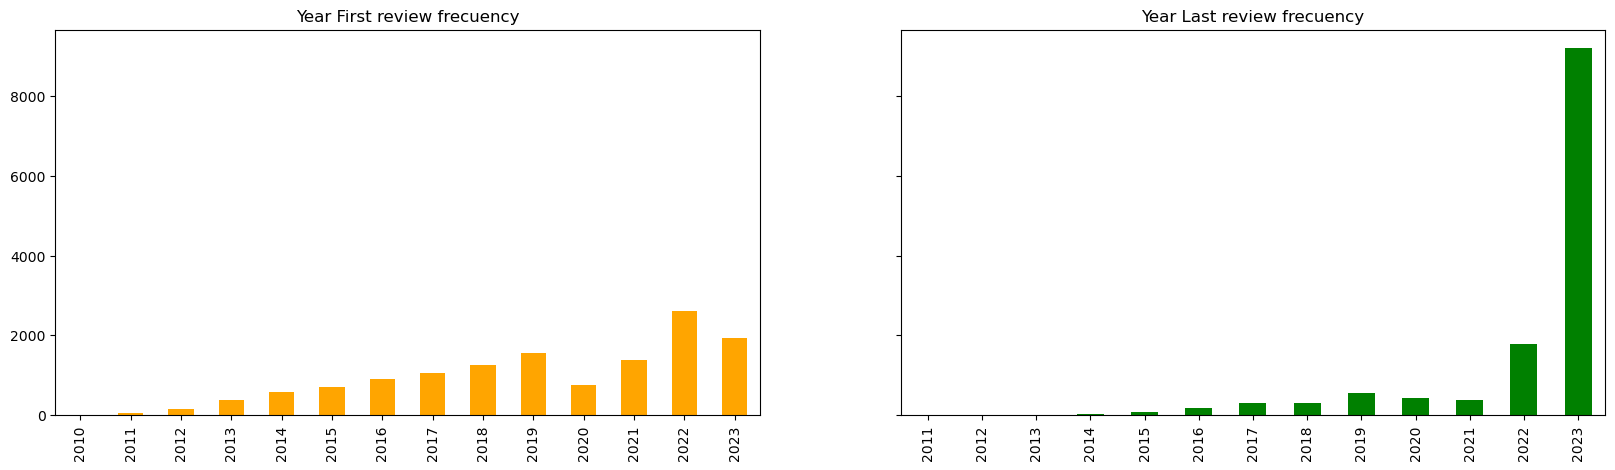

In [50]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["year_first_review"].value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax1, color="orange")
ax1.set_title("Year First review frecuency")
listings_df["year_last_review"].value_counts().sort_index(ascending=True).plot(kind="bar", ax=ax2, color="green")
ax2.set_title("Year Last review frecuency")

plt.show()

## 2. Bivariate analysis

In [104]:
listings_df["year_last_review"]= listings_df["year_last_review"].astype(float)

In [116]:
fil_listings_df= listings_df[(listings_df["year_last_review"]>=2022) & ~listings_df["year_last_review"].isnull()].reset_index(drop=True).copy()

In [117]:
fil_listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         10982 non-null  float64
 1   review_scores_accuracy       10982 non-null  float64
 2   review_scores_cleanliness    10982 non-null  float64
 3   review_scores_checkin        10982 non-null  float64
 4   review_scores_communication  10982 non-null  float64
 5   review_scores_location       10982 non-null  float64
 6   review_scores_value          10982 non-null  float64
dtypes: float64(7)
memory usage: 600.7 KB


In [118]:
fil_listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000
mean,4.565583,4.620805,4.592450,4.708247,4.709649,4.747220,4.442202
std,0.471738,0.462206,0.464901,0.414679,0.432853,0.342646,0.515860
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.400000,4.500000,4.450000,4.620000,4.620000,4.670000,4.270000
50%,4.670000,4.740000,4.710000,4.830000,4.830000,4.830000,4.550000
75%,4.870000,4.910000,4.900000,4.970000,4.980000,4.960000,4.750000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [107]:
listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         13198 non-null  float64
 1   review_scores_accuracy       13111 non-null  float64
 2   review_scores_cleanliness    13112 non-null  float64
 3   review_scores_checkin        13107 non-null  float64
 4   review_scores_communication  13113 non-null  float64
 5   review_scores_location       13108 non-null  float64
 6   review_scores_value          13108 non-null  float64
dtypes: float64(7)
memory usage: 942.4 KB


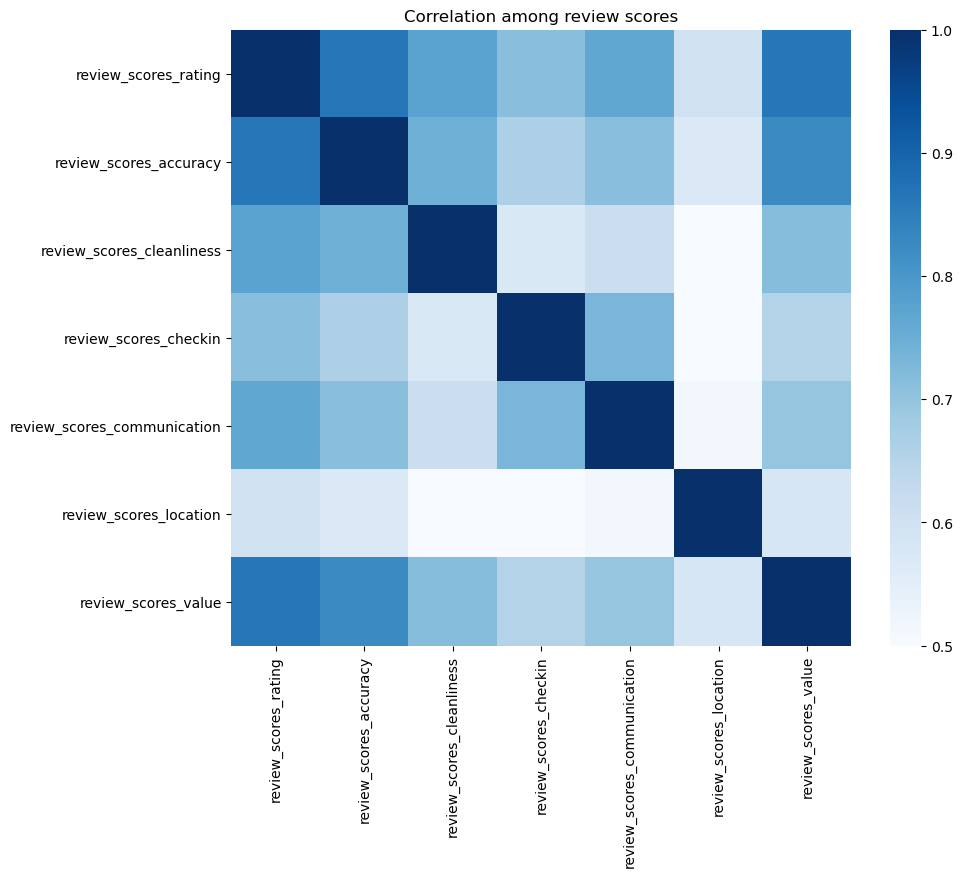

In [119]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    fil_listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [120]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  fil_listings_df.loc[fil_listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(1049, 79)

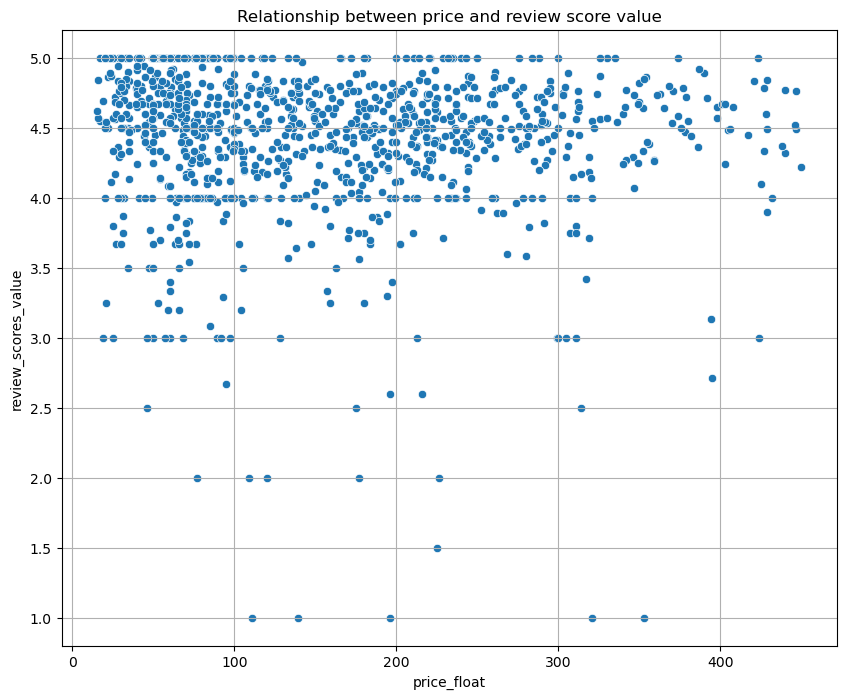

In [121]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [122]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = fil_listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

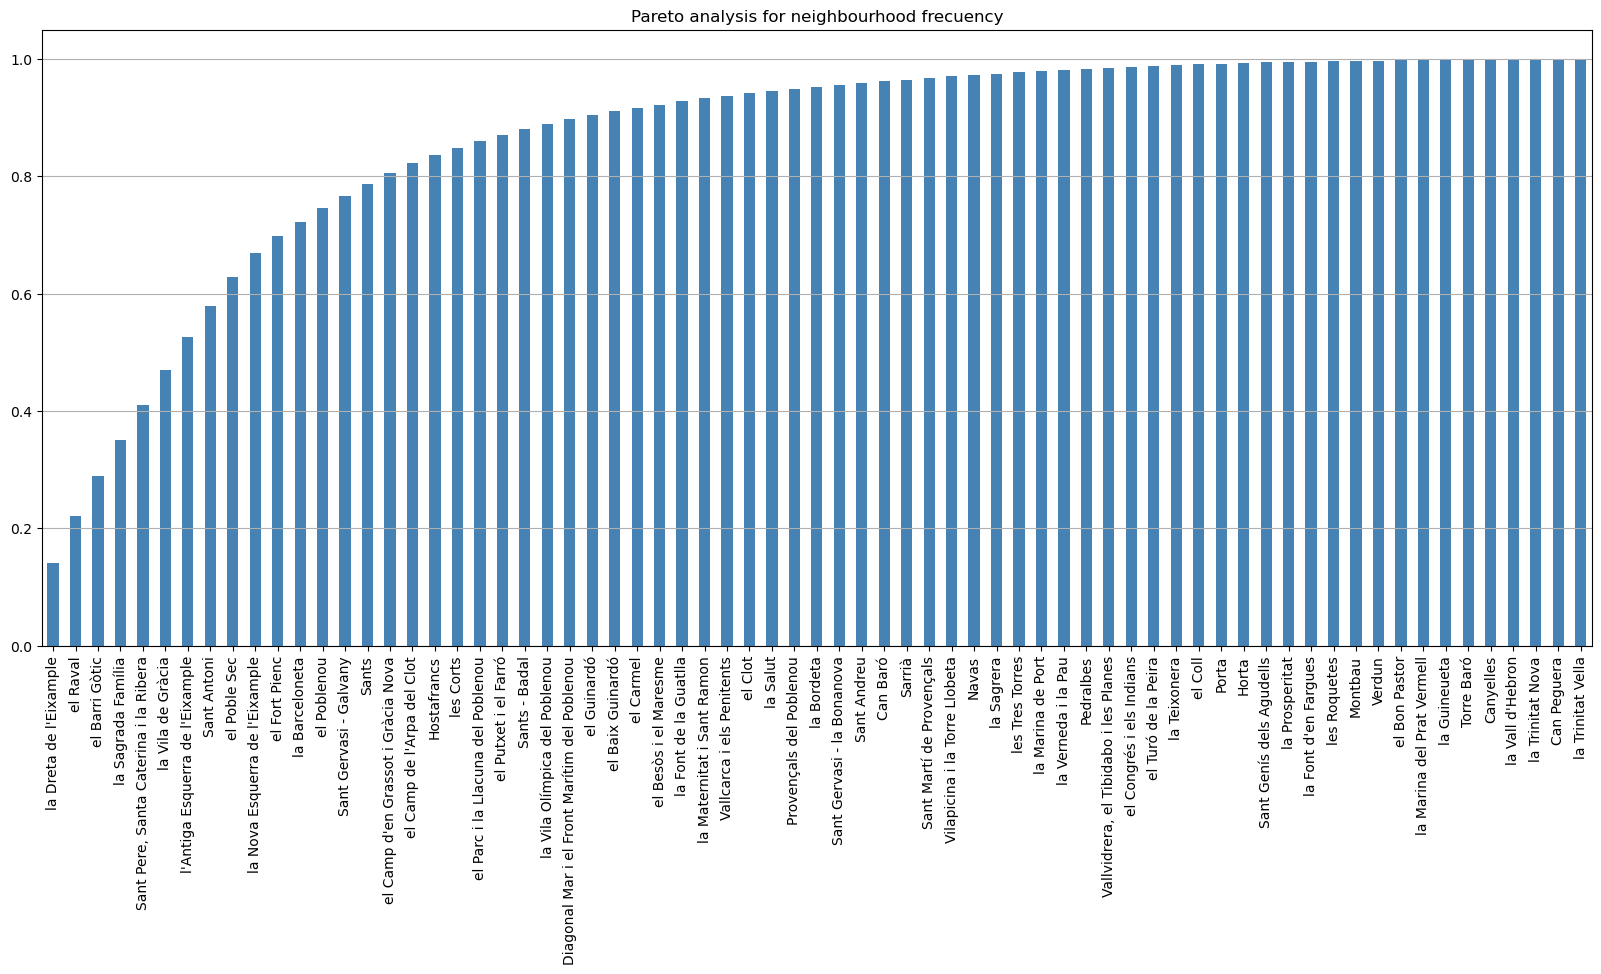

In [123]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [164]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.6].index.tolist()
most_representative_neighbourhoods

["la Dreta de l'Eixample",
 'el Raval',
 'el Barri Gòtic',
 'la Sagrada Família',
 'Sant Pere, Santa Caterina i la Ribera',
 'la Vila de Gràcia',
 "l'Antiga Esquerra de l'Eixample",
 'Sant Antoni']

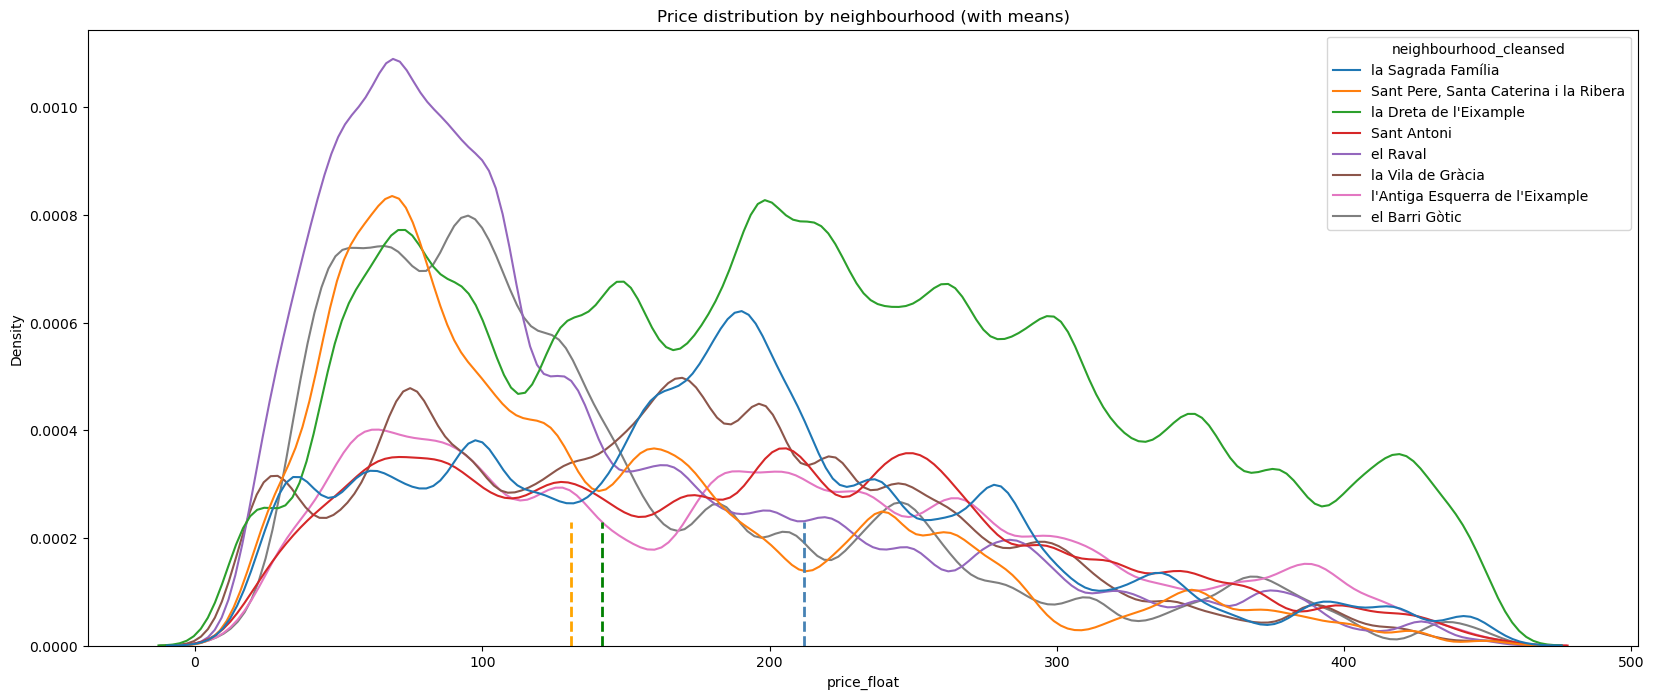

In [165]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [166]:
# Let's make some calculations for determining an outlier threshold
q1_nr = listings_df["number_of_reviews_ltm"].quantile(0.25)
q3_nr = listings_df["number_of_reviews_ltm"].quantile(0.75)
iqr_nr = q3_nr - q1_nr

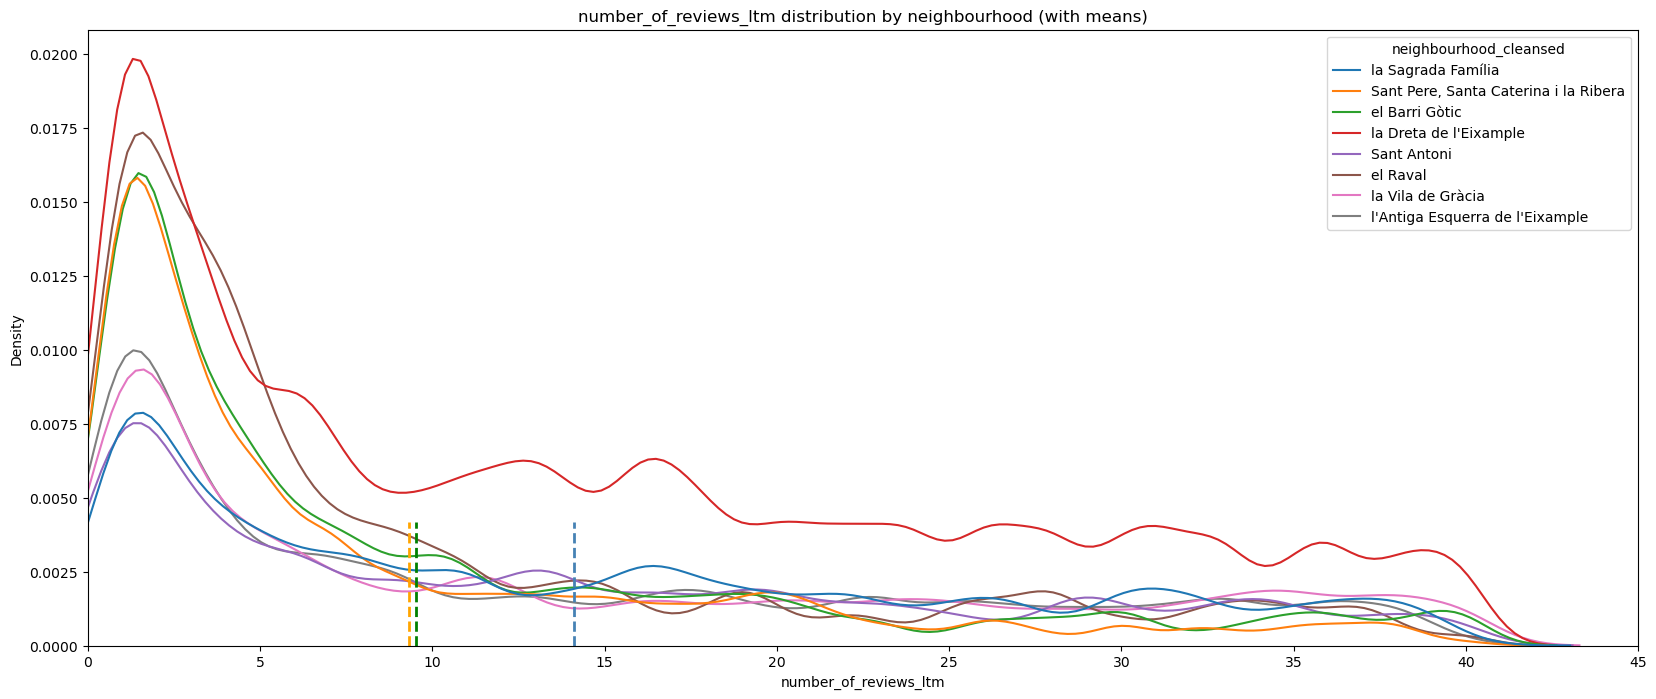

In [167]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["number_of_reviews_ltm"] <= (q3_nr + 1.5 * iqr_nr)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews_ltm",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["number_of_reviews_ltm"] <= (q3_nr + 1.5 * iqr_nr)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews_ltm"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("number_of_reviews_ltm distribution by neighbourhood (with means)")
plt.xlim([0, 45])
plt.show()

In [168]:
# Let's make some calculations for determining an outlier threshold
q1_mn = listings_df["minimum_nights"].quantile(0.25)
q3_mn = listings_df["minimum_nights"].quantile(0.75)
iqr_mn = q3_mn - q1_mn

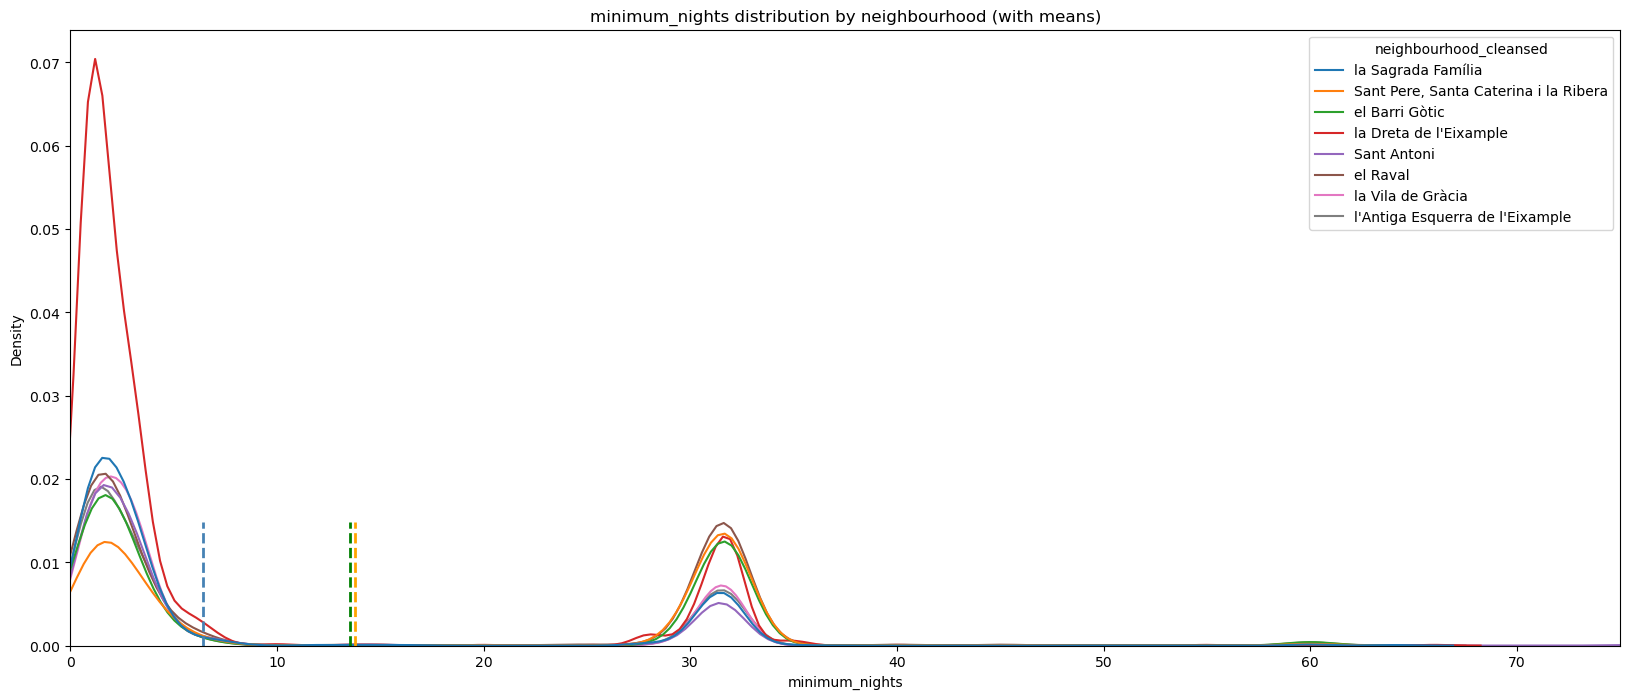

In [169]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["minimum_nights"] <= (q3_mn + 1.5 * iqr_mn)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="minimum_nights",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["minimum_nights"] <= (q3_mn + 1.5 * iqr_mn)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "minimum_nights"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("minimum_nights distribution by neighbourhood (with means)")
plt.xlim([0, 75])
plt.show()

In [170]:
# Let's make some calculations for determining an outlier threshold
q1_sr = listings_df["review_scores_rating"].quantile(0.25)
q3_sr = listings_df["review_scores_rating"].quantile(0.75)
iqr_sr = q3_sr - q1_sr

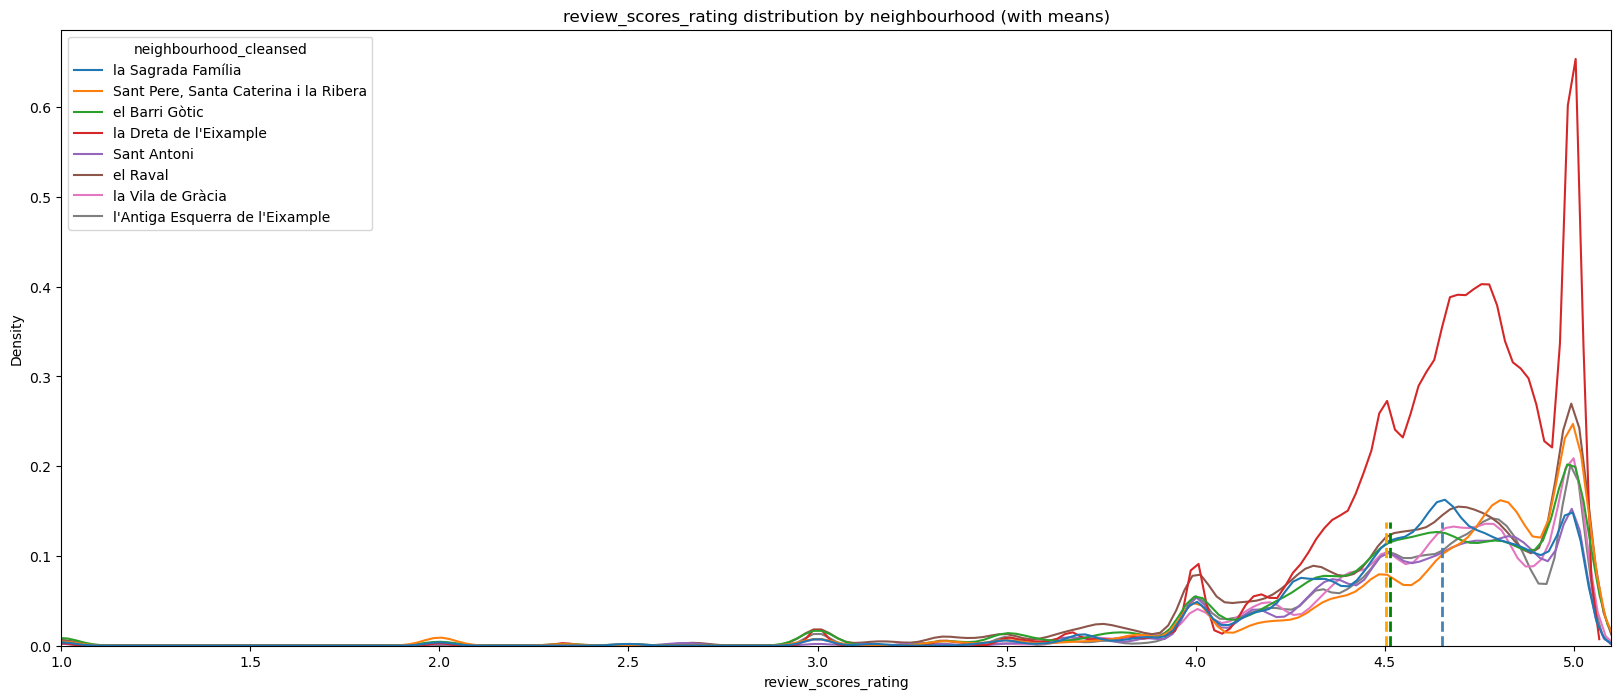

In [171]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["review_scores_rating"] <= (q3_sr + 1.5 * iqr_sr)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="review_scores_rating",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["review_scores_rating"] <= (q3_sr + 1.5 * iqr_sr)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "review_scores_rating"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("review_scores_rating distribution by neighbourhood (with means)")
plt.xlim([1, 5.1])
plt.show()

In [172]:
# Let's make some calculations for determining an outlier threshold
q1_av30 = listings_df["availability_30"].quantile(0.25)
q3_av30 = listings_df["availability_30"].quantile(0.75)
iqr_av30 = q3_av30 - q1_av30

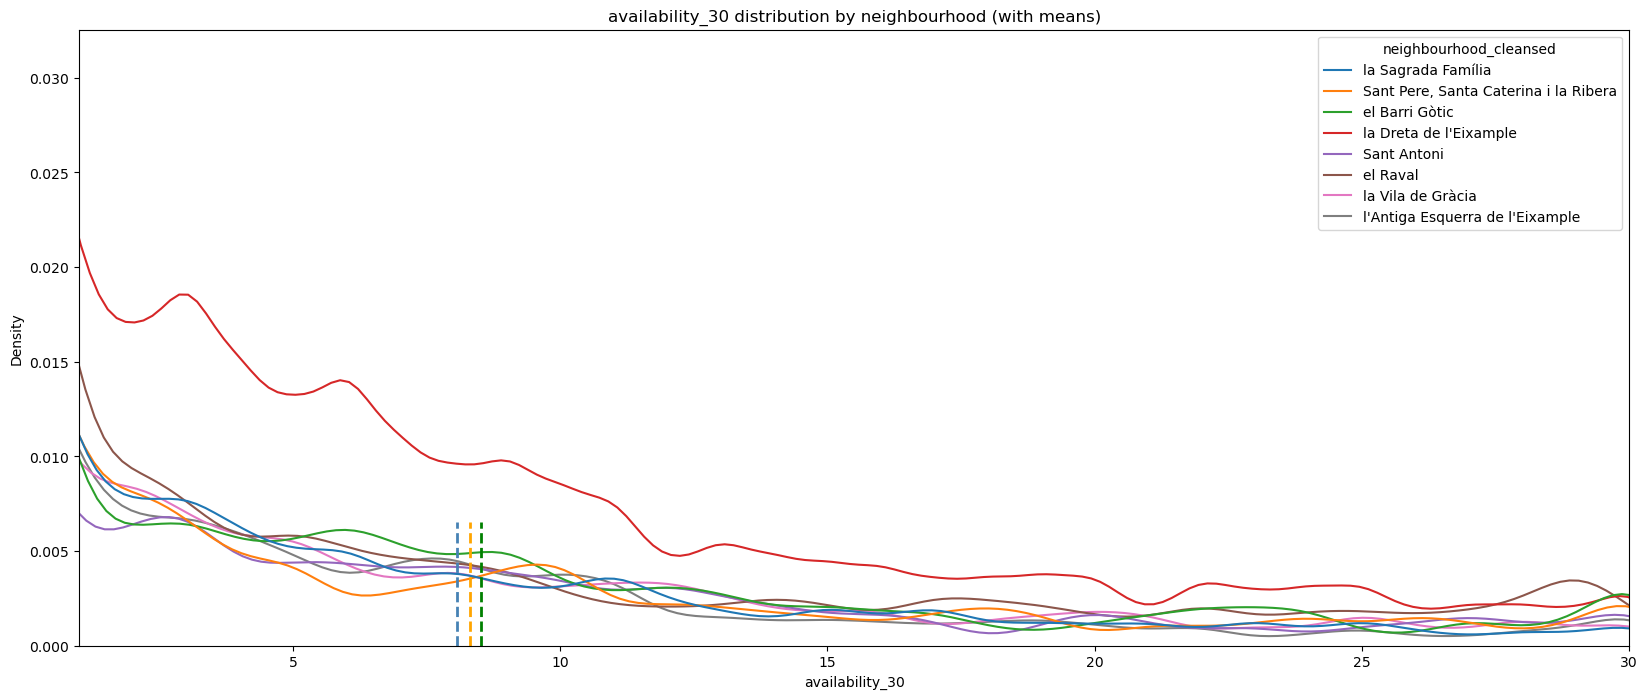

In [173]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["availability_30"] <= (q3_av30 + 1.5 * iqr_av30)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="availability_30",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["availability_30"] <= (q3_av30 + 1.5 * iqr_av30)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "availability_30"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("availability_30 distribution by neighbourhood (with means)")
plt.xlim([1, 30])
plt.show()

In [174]:
# Let's make some calculations for determining an outlier threshold
q1_av60 = listings_df["availability_60"].quantile(0.25)
q3_av60 = listings_df["availability_60"].quantile(0.75)
iqr_av60 = q3_av60 - q1_av60

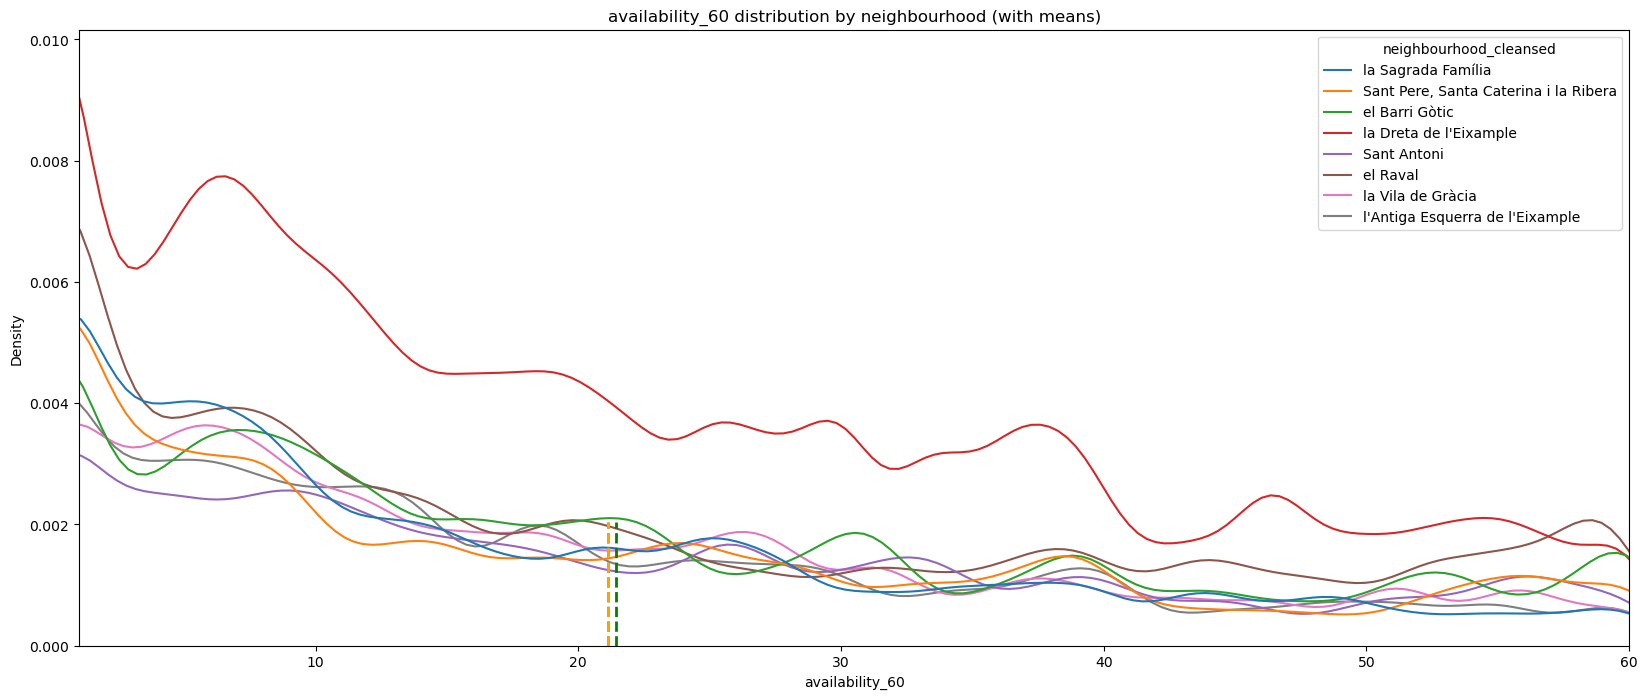

In [175]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["availability_60"] <= (q3_av60 + 1.5 * iqr_av60)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="availability_60",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["availability_60"] <= (q3_av60 + 1.5 * iqr_av60)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "availability_60"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("availability_60 distribution by neighbourhood (with means)")
plt.xlim([1, 60])
plt.show()

In [176]:
# Let's make some calculations for determining an outlier threshold
q1_av90 = listings_df["availability_90"].quantile(0.25)
q3_av90 = listings_df["availability_90"].quantile(0.75)
iqr_av90 = q3_av90 - q1_av90

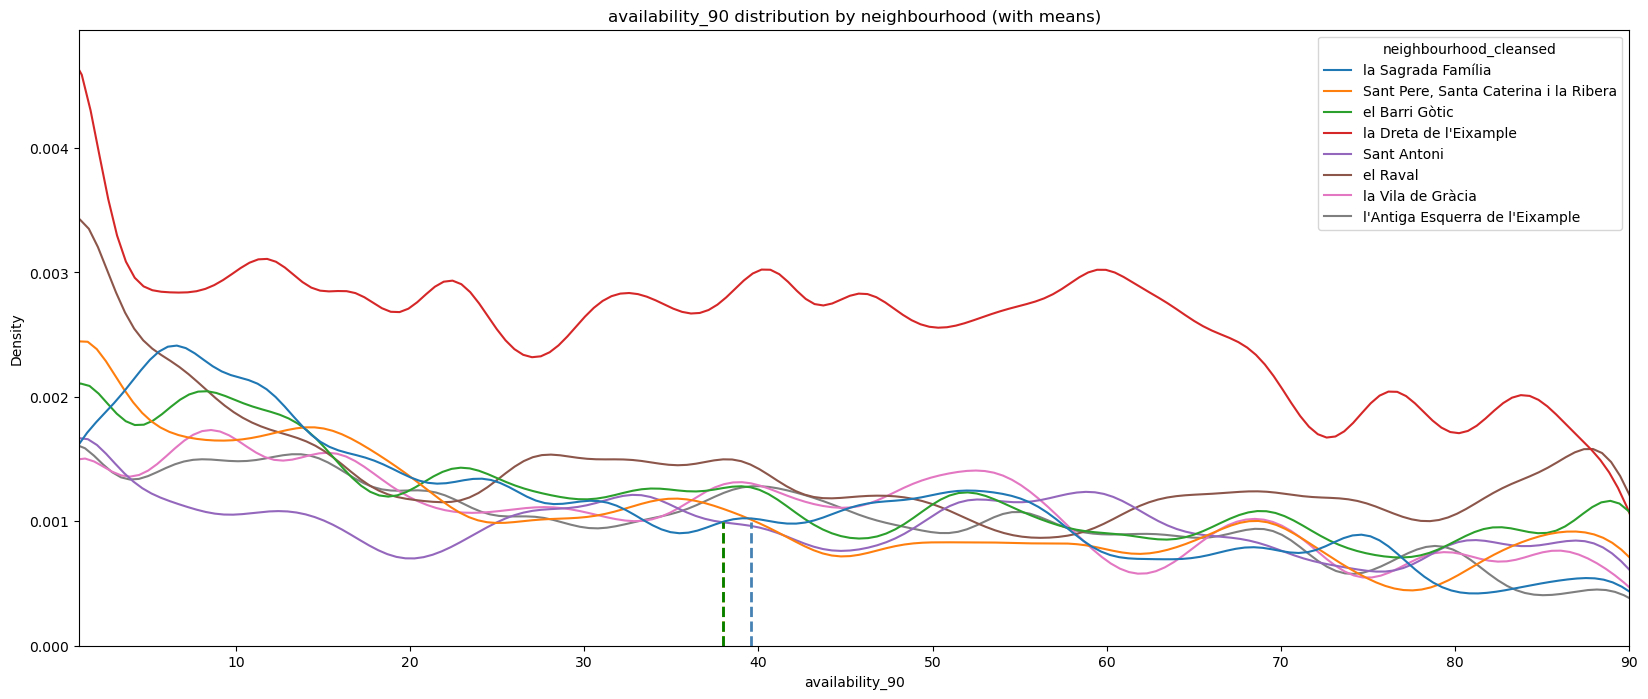

In [177]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["availability_90"] <= (q3_av90 + 1.5 * iqr_av90)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="availability_90",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["availability_90"] <= (q3_av90 + 1.5 * iqr_av90)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "availability_90"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("availability_90 distribution by neighbourhood (with means)")
plt.xlim([1, 90])
plt.show()

In [178]:
# Let's make some calculations for determining an outlier threshold
q1_av365 = listings_df["availability_365"].quantile(0.25)
q3_av365 = listings_df["availability_365"].quantile(0.75)
iqr_av365 = q3_av365 - q1_av365

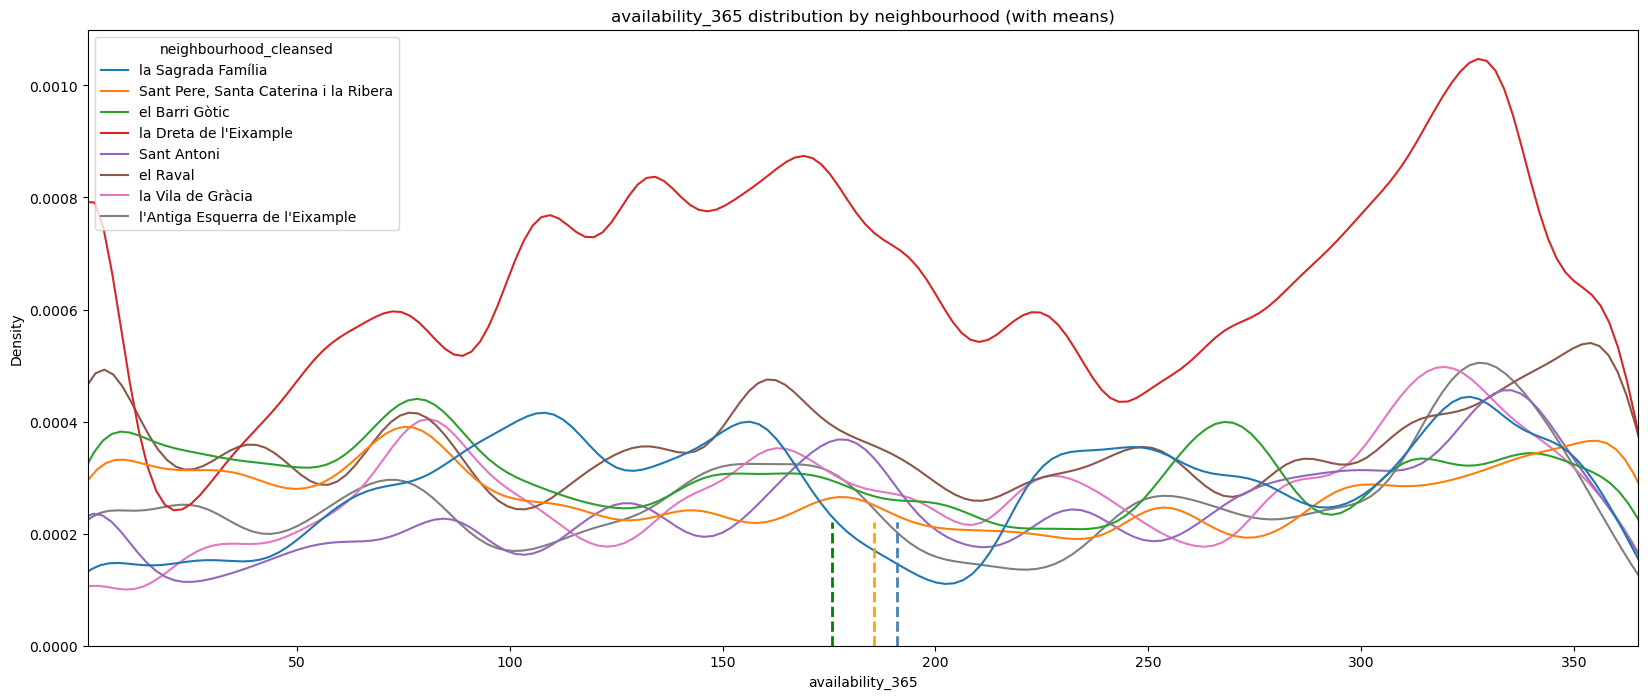

In [179]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=fil_listings_df.loc[fil_listings_df["availability_365"] <= (q3_av365 + 1.5 * iqr_av365)].loc[fil_listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="availability_365",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(fil_listings_df.loc[fil_listings_df["availability_365"] <= (q3_av365 + 1.5 * iqr_av365)].loc[fil_listings_df["neighbourhood_cleansed"] == neighbourhood, "availability_365"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("availability_365 distribution by neighbourhood (with means)")
plt.xlim([1, 365])
plt.show()